<a href="https://colab.research.google.com/github/ShahinGanbar/QSS_tasks/blob/main/Week6_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [ ]:
file_path = "/content/drive/MyDrive/loan_prediction.csv"

data = pd.read_csv(file_path)

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data.isnull().sum() / data.shape[0]

,0
Loan_ID,0.000000
Gender,0.021173
Married,0.004886
Dependents,0.024430
Education,0.000000
Self_Employed,0.052117
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,0.035831
Loan_Amount_Term,0.022801


In [ ]:
data.shape

(614, 13)

In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
data.drop("Loan_ID", axis=1, inplace=True)

In [ ]:
data.columns = data.columns.str.lower()

In [ ]:
data.columns

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [ ]:
data.head(3)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
data.nunique()

,0
gender,2
married,2
dependents,4
education,2
self_employed,2
applicantincome,505
coapplicantincome,287
loanamount,203
loan_amount_term,10
credit_history,2


In [ ]:
data = data[data["gender"].notna()]
data = data[data["married"].notna()]
data = data[data["dependents"].notna()]
data = data[data["self_employed"].notna()]


In [ ]:
data.isnull().sum()

,0
gender,0
married,0
dependents,0
education,0
self_employed,0
applicantincome,0
coapplicantincome,0
loanamount,19
loan_amount_term,12
credit_history,43


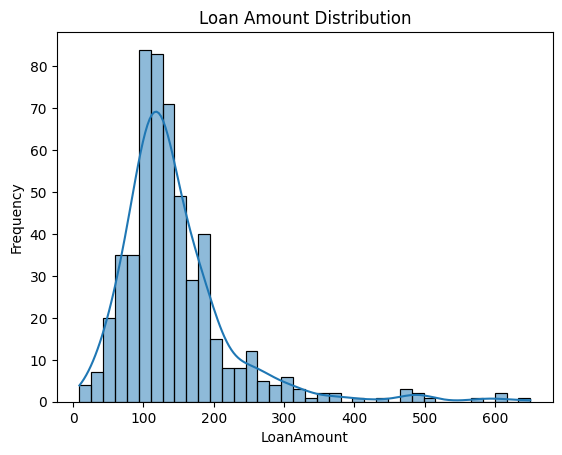

In [ ]:
sns.histplot(data['loanamount'], kde=True)
plt.title("Loan Amount Distribution")
plt.xlabel("LoanAmount")
plt.ylabel("Frequency")
plt.show()

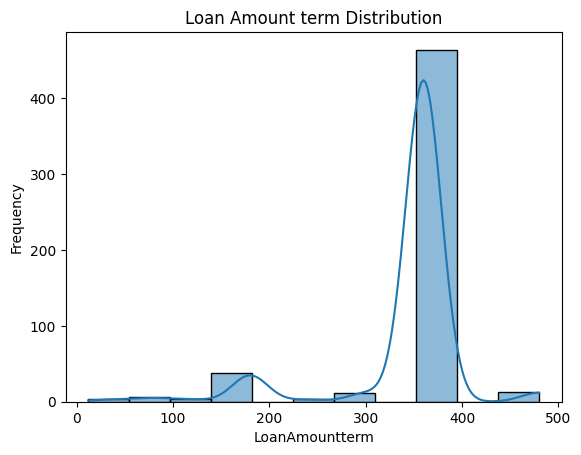

In [ ]:
sns.histplot(data['loan_amount_term'], kde=True)
plt.title("Loan Amount term Distribution")
plt.xlabel("LoanAmountterm")
plt.ylabel("Frequency")
plt.show()

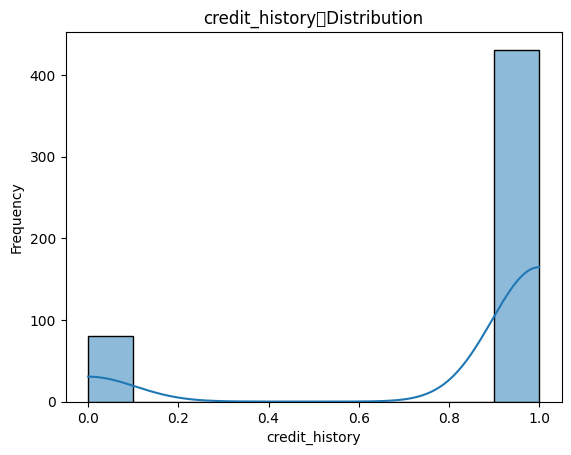

In [ ]:
sns.histplot(data['credit_history'], kde=True)
plt.title("credit_history	Distribution")
plt.xlabel("credit_history")
plt.ylabel("Frequency")
plt.show()

In [ ]:
data['credit_history'].fillna(data['credit_history'].mode()[0], inplace=True)
data['loan_amount_term'].fillna(data['loan_amount_term'].mode()[0], inplace=True)
data['loanamount'].fillna(data['loanamount'].median(), inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

cols_to_le = ["gender", "married", "education", "self_employed", "loan_status"]

for col in cols_to_le:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))



In [ ]:
data.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0.0,127.0,360.0,1.0,Urban,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [ ]:
data = pd.get_dummies(data, columns=["property_area"],drop_first=True,dtype=int)

In [ ]:
data.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,loan_status,property_area_Semiurban,property_area_Urban
0,1,0,0,0,0,5849,0.0,127.0,360.0,1.0,1,0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1


In [ ]:
data.columns = data.columns.str.lower()

In [ ]:
data.columns

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'loan_status',
       'property_area_semiurban', 'property_area_urban'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   554 non-null    int64  
 1   married                  554 non-null    int64  
 2   dependents               554 non-null    object 
 3   education                554 non-null    int64  
 4   self_employed            554 non-null    int64  
 5   applicantincome          554 non-null    int64  
 6   coapplicantincome        554 non-null    float64
 7   loanamount               554 non-null    float64
 8   loan_amount_term         554 non-null    float64
 9   credit_history           554 non-null    float64
 10  loan_status              554 non-null    int64  
 11  property_area_semiurban  554 non-null    int64  
 12  property_area_urban      554 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 60.6+ KB


In [ ]:
data.isnull().sum()

,0
gender,0
married,0
dependents,0
education,0
self_employed,0
applicantincome,0
coapplicantincome,0
loanamount,0
loan_amount_term,0
credit_history,0


In [ ]:
data.nunique()

,0
gender,2
married,2
dependents,4
education,2
self_employed,2
applicantincome,463
coapplicantincome,270
loanamount,194
loan_amount_term,10
credit_history,2


In [ ]:
data.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,loan_status,property_area_semiurban,property_area_urban
0,1,0,0,0,0,5849,0.0,127.0,360.0,1.0,1,0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1


In [ ]:
data["loan_status"].value_counts() / data.shape[0]

,count
loan_status,
1,0.689531
0,0.310469


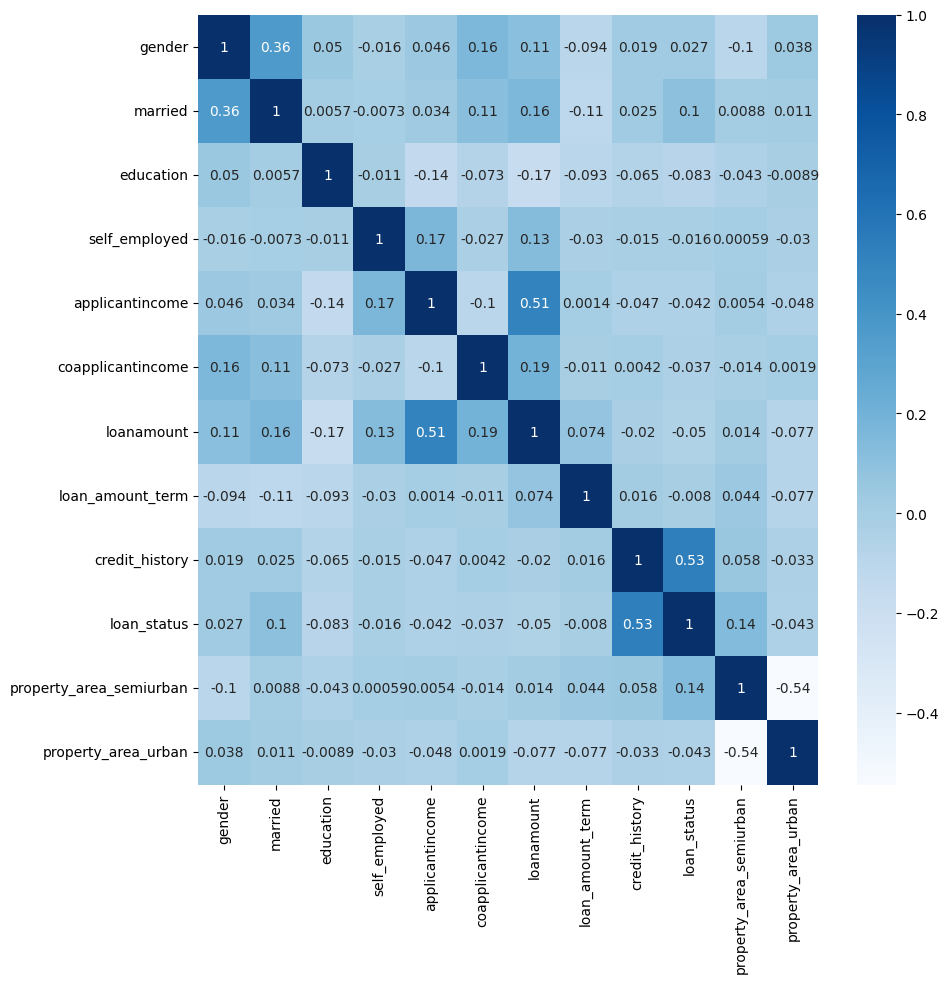

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap="Blues")
plt.show()


In [ ]:
data.drop("loan_amount_term",axis=1,inplace=True)

In [ ]:
data.drop("self_employed",axis=1,inplace=True)

In [ ]:
data.head()

,gender,married,dependents,education,applicantincome,coapplicantincome,loanamount,credit_history,loan_status,property_area_semiurban,property_area_urban
0,1,0,0,0,5849,0.0,127.0,1.0,1,0,1
1,1,1,1,0,4583,1508.0,128.0,1.0,0,0,0
2,1,1,0,0,3000,0.0,66.0,1.0,1,0,1
3,1,1,0,1,2583,2358.0,120.0,1.0,1,0,1
4,1,0,0,0,6000,0.0,141.0,1.0,1,0,1


In [ ]:
data.dependents.dtypes

dtype('O')

In [ ]:
data.dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

In [ ]:
data['dependents'] = data['dependents'].replace({
    '0': 0,
    '1': 1,
    '2': 2,
    '3+': 3
}).astype(int)

In [ ]:
X = data.drop("loan_status",axis=1)
y = data["loan_status"]

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
print(data.dtypes)


gender                       int64
married                      int64
dependents                   int64
education                    int64
applicantincome              int64
coapplicantincome          float64
loanamount                 float64
credit_history             float64
loan_status                  int64
property_area_semiurban      int64
property_area_urban          int64
dtype: object


Voting Classifier

In [ ]:
lr_pipeline = Pipeline([
    ("scaler",StandardScaler()),
    ("lr", LogisticRegression(class_weight="balanced"))
])

svc_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svc" , SVC(probability=True,class_weight="balanced"))
])

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

gb_clf = GradientBoostingClassifier()
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight)
lgbm_clf = LGBMClassifier(
    is_unbalance=True,
    num_leaves=31,
    min_child_samples=5,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100
)
catboost_clf = CatBoostClassifier(verbose=0, auto_class_weights='Balanced')

voting_clf = VotingClassifier(estimators=[
    ('logreg', lr_pipeline),
    ('svc', svc_pipeline),
    ('gb', gb_clf),
    ('xgb', xgb_clf),
    ('lgbm', lgbm_clf),
    ('catboost', catboost_clf)
], voting="soft")


In [ ]:
voting_clf.fit(X_train,y_train)


[LightGBM] [Info] Number of positive: 264, number of negative: 123
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 307
[LightGBM] [Info] Number of data points in the train set: 387, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.682171 -> initscore=0.763765
[LightGBM] [Info] Start training from score 0.763765


VotingClassifier(estimators=[('logreg',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('lr',
                                               LogisticRegression(class_weight='balanced'))])),
                             ('svc',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svc',
                                               SVC(class_weight='balanced',
                                                   probability=True))])),
                             ('gb', GradientBoostingClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            cols...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('lgbm',
                              LGBMClassifier(is_unbalance=True,
                                             min_child_samples=5)),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x794fc6716ad0>)],
                 voting='soft')

In [ ]:

for clf in (lr_pipeline, svc_pipeline, gb_clf, xgb_clf, lgbm_clf, catboost_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print(clf.__class__.__name__, classification_report(y_test, y_pred))
    print("-"*80)


Pipeline 0.7784431137724551
Pipeline               precision    recall  f1-score   support

           0       0.62      0.63      0.63        49
           1       0.85      0.84      0.84       118

    accuracy                           0.78       167
   macro avg       0.73      0.74      0.73       167
weighted avg       0.78      0.78      0.78       167

--------------------------------------------------------------------------------
Pipeline 0.7544910179640718
Pipeline               precision    recall  f1-score   support

           0       0.58      0.59      0.59        49
           1       0.83      0.82      0.83       118

    accuracy                           0.75       167
   macro avg       0.70      0.71      0.71       167
weighted avg       0.76      0.75      0.76       167

--------------------------------------------------------------------------------
GradientBoostingClassifier 0.8502994011976048
GradientBoostingClassifier               precision    recall  f1

In [ ]:

y_pred = voting_clf.predict(X_test)
y_pred_prob = voting_clf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)



Accuracy: 0.8083832335329342
Precision: 0.8412698412698413
Recall: 0.8983050847457628
F1 Score: 0.8688524590163934
ROC AUC Score: 0.7986855759252853


In [ ]:
confusion_matrix(y_test, y_pred)

classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.71      0.59      0.64        49
           1       0.84      0.90      0.87       118

    accuracy                           0.81       167
   macro avg       0.77      0.75      0.76       167
weighted avg       0.80      0.81      0.80       167

